In [8]:
import os
from collections import defaultdict
import pickle

import numpy as np
import matplotlib.pyplot as plt

from utils.parse_logs import parse_metrics

In [9]:
PAR_DIR = './results/drop-edge/long-range'

In [15]:
dataset = 'MUTAG'   # Set one of Proteins, PTC or MUTAG
GNNs = ('GCN',)
train_accs, es_test_accs = defaultdict(list), defaultdict(list)

for exp_dir in os.listdir(PAR_DIR):
    with open(f'{PAR_DIR}/{exp_dir}/config.pkl', 'rb') as f:
        config = pickle.load(f)
    if config.dataset == dataset and config.gnn in GNNs and config.dropout == 'DropEdge':
        train, val, test = parse_metrics(f'{PAR_DIR}/{exp_dir}/logs')
        train_acc = max(train['Accuracy'])
        train_accs[(config.gnn, config.drop_p, len(config.gnn_layer_sizes))].append(train_acc)
        es_test_acc = test['Accuracy'][np.argmax(val['Accuracy'])]
        es_test_accs[(config.gnn, config.drop_p, len(config.gnn_layer_sizes))].append(es_test_acc)

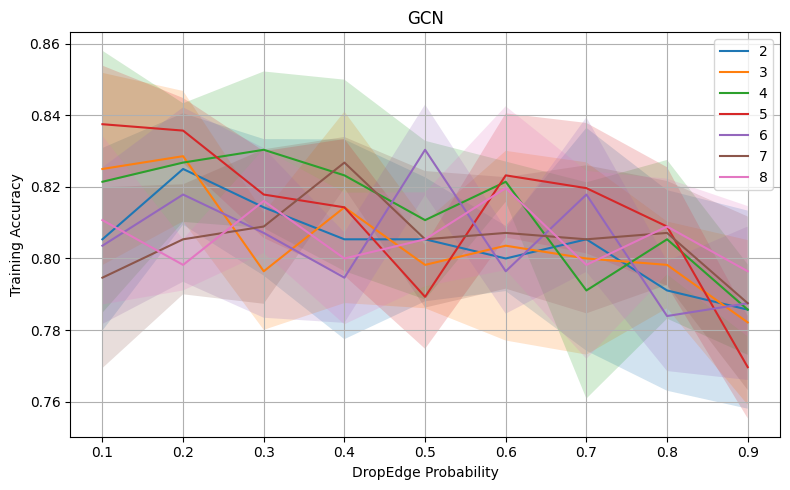

In [16]:
DEPTHS = range(2, 9)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

fig, axs = plt.subplots(1, len(GNNs), figsize=(8*len(GNNs), 5))
plotting_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in train_accs.items()}

for gnn, ax in zip(GNNs, (axs,)):
    for depth in DEPTHS:
        lower = ([plotting_accs[(gnn, drop_p, depth)][0]-plotting_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        mean = ([plotting_accs[(gnn, drop_p, depth)][0] for drop_p in DROP_PS])
        upper = ([plotting_accs[(gnn, drop_p, depth)][0]+plotting_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        ax.plot(DROP_PS, mean, label=depth)
        ax.fill_between(DROP_PS, lower, upper, alpha=0.2)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel('Training Accuracy')
    ax.set_title(gnn)
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()

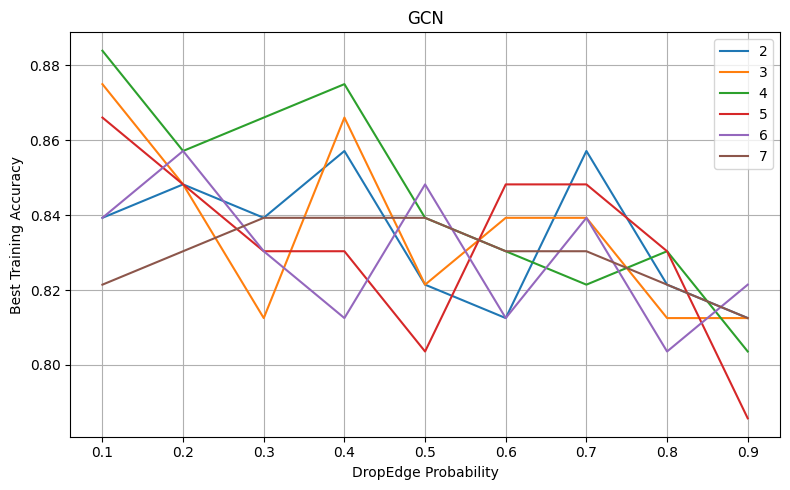

In [17]:
DEPTHS = range(2, 8)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

fig, axs = plt.subplots(1, len(GNNs), figsize=(8*len(GNNs), 5))
plotting_accs = {exp: max(samples) for exp, samples in train_accs.items()}

for gnn, ax in zip(GNNs, (axs,)):
    for depth in DEPTHS:
        ax.plot(DROP_PS, [plotting_accs[(gnn, drop_p, depth)] for drop_p in DROP_PS], label=depth)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel('Best Training Accuracy')
    ax.set_title(gnn)
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()

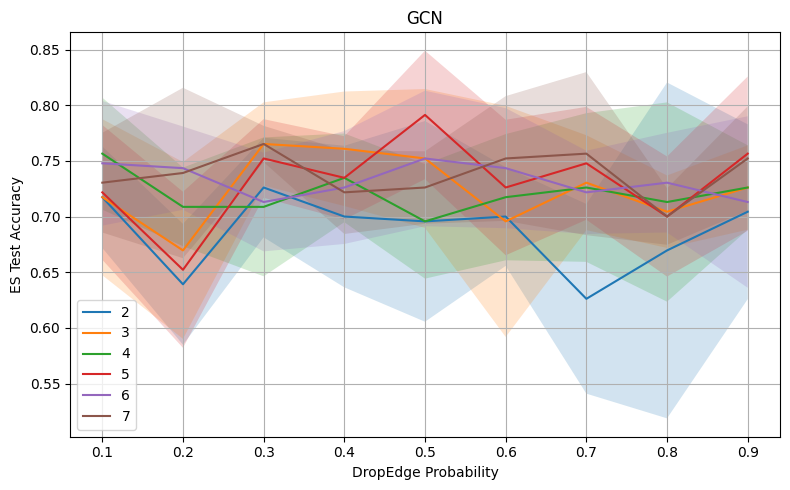

In [18]:
DEPTHS = range(2, 8)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

fig, axs = plt.subplots(1, len(GNNs), figsize=(8*len(GNNs), 5))
plotting_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in es_test_accs.items()}

for gnn, ax in zip(GNNs, (axs,)):
    for depth in DEPTHS:
        lower = ([plotting_accs[(gnn, drop_p, depth)][0]-plotting_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        mean = ([plotting_accs[(gnn, drop_p, depth)][0] for drop_p in DROP_PS])
        upper = ([plotting_accs[(gnn, drop_p, depth)][0]+plotting_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        ax.plot(DROP_PS, mean, label=depth)
        ax.fill_between(DROP_PS, lower, upper, alpha=0.2)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel('ES Test Accuracy')
    ax.set_title(gnn)
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()

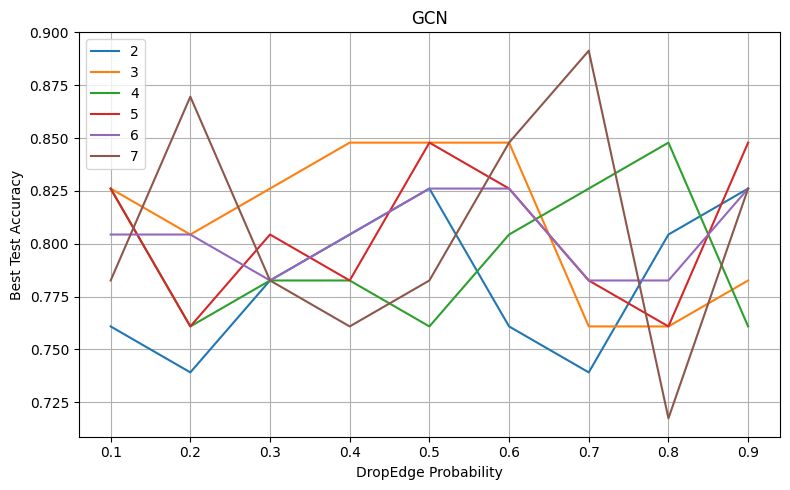

In [19]:
DEPTHS = range(2, 8)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

fig, axs = plt.subplots(1, len(GNNs), figsize=(8*len(GNNs), 5))
plotting_accs = {exp: max(samples) for exp, samples in es_test_accs.items()}

for gnn, ax in zip(GNNs, (axs,)):
    for depth in DEPTHS:
        ax.plot(DROP_PS, [plotting_accs[(gnn, drop_p, depth)] for drop_p in DROP_PS], label=depth)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel('Best Test Accuracy')
    ax.set_title(gnn)
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()